In [34]:
import math
from sympy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta

## Section 1: Undamped

In [35]:
L = 1E-6
C = 10E-9
w = 1/np.sqrt(L*C)

t = np.arange(0,5*np.pi*1E-7, 10E-9)

x1 = []
x2 = []

for i in t:
    var = np.cos(1E7*i)
    x2.append(var)
    var = -C*w*np.sin(w*i)
    x1.append(var)

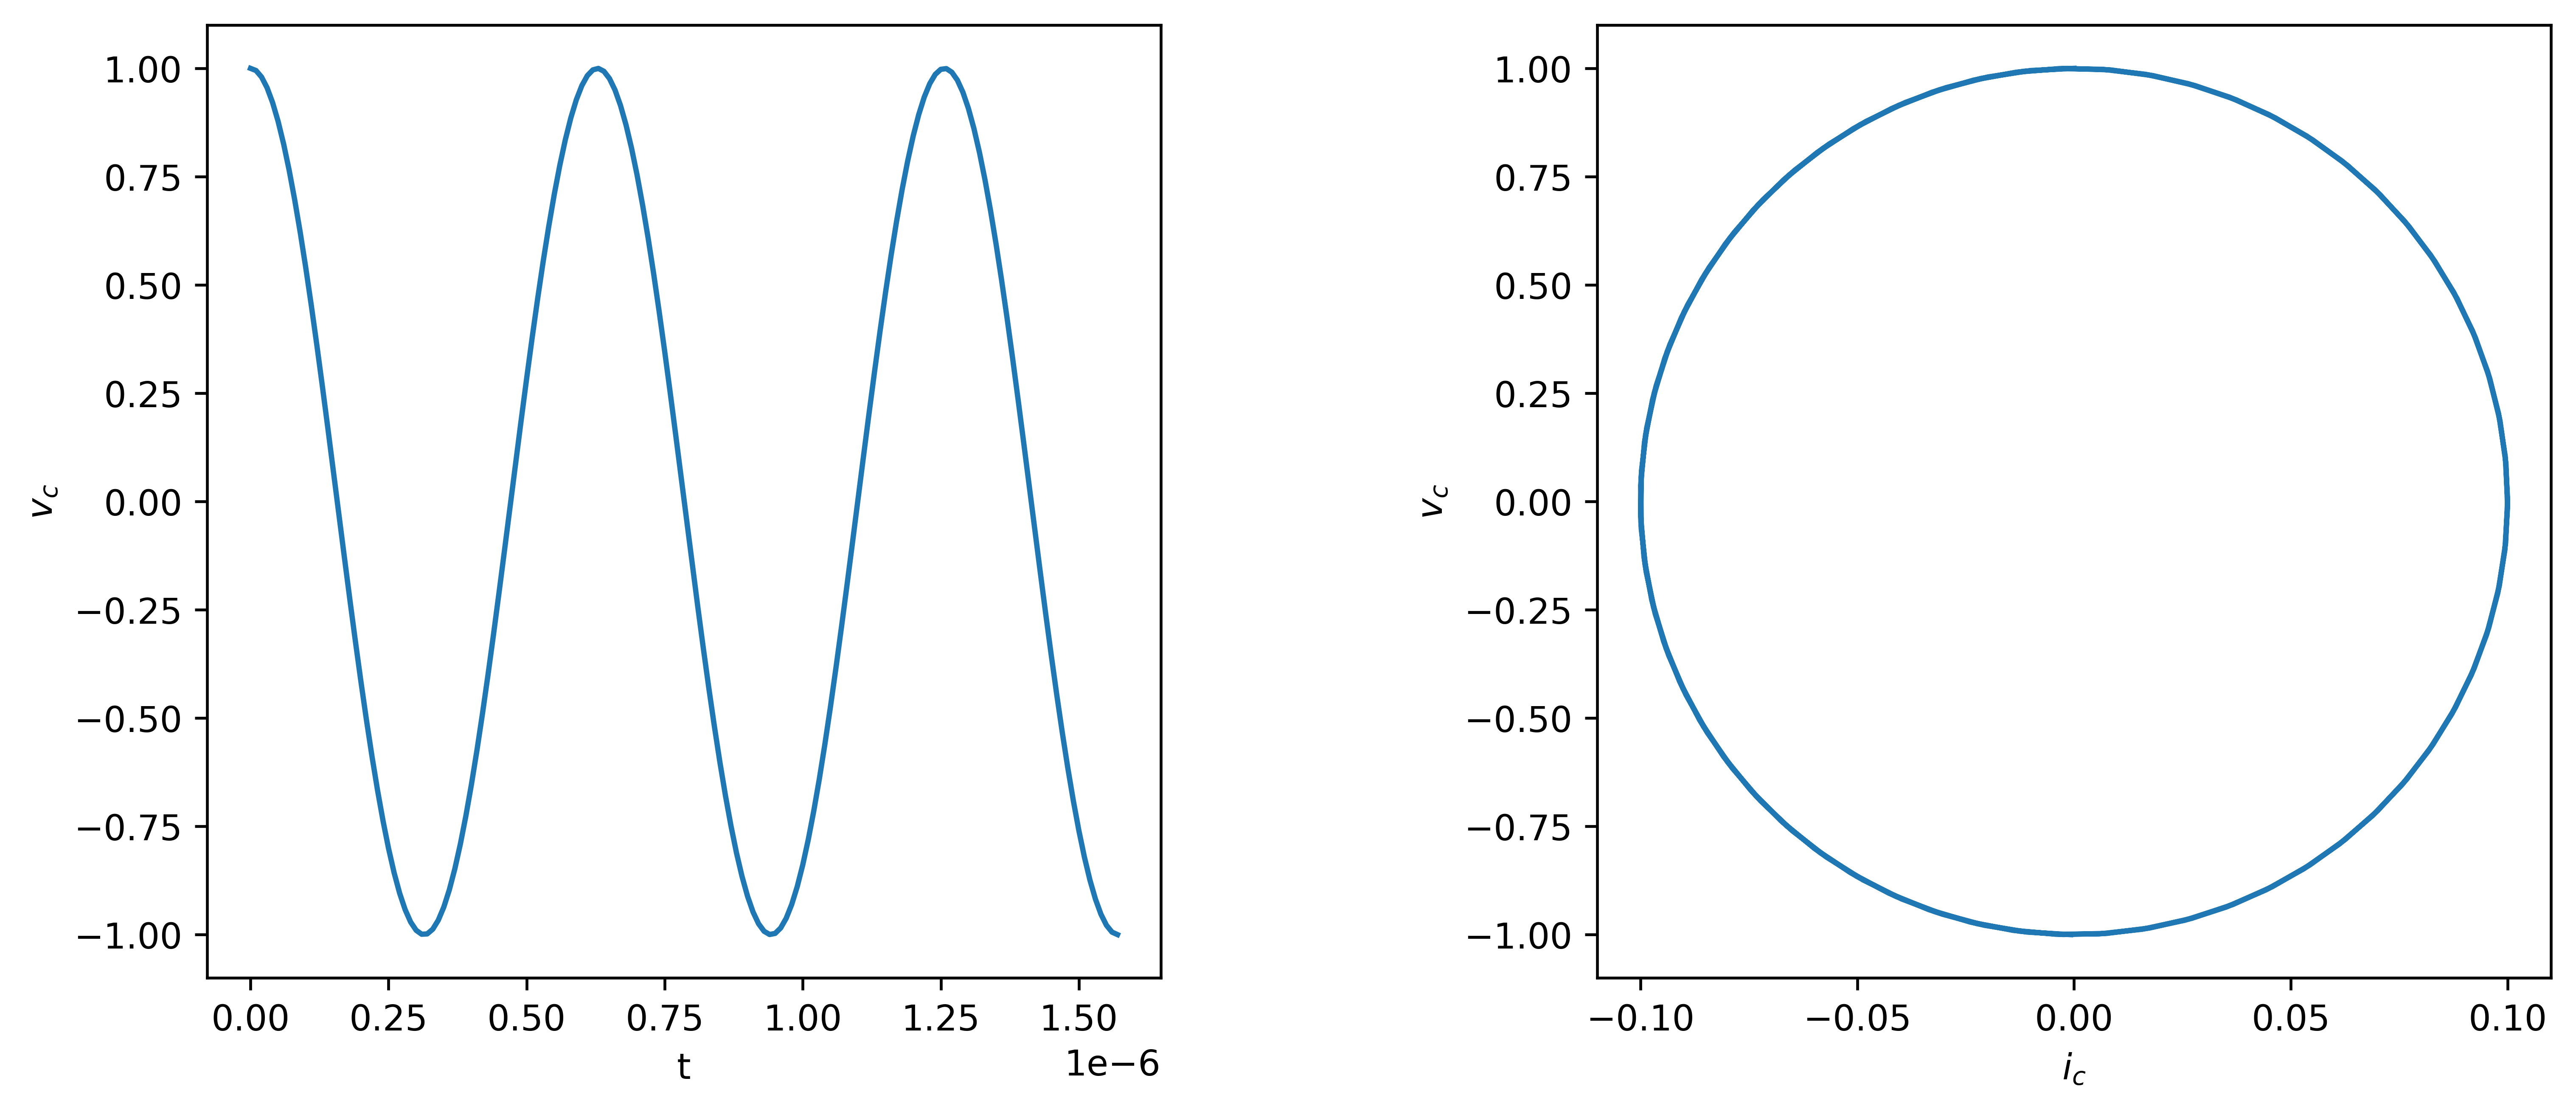

In [36]:
fig = plt.figure(figsize=(10,4.25), layout='constrained', dpi=600)
fig.get_layout_engine().set(wspace=0.2)
axL = fig.add_subplot(1,2,1, xlabel='t', ylabel='$v_c$')
axR = fig.add_subplot(1,2,2, xlabel='$i_c$', ylabel='$v_c$')
axR.set_xticks([-0.1, -0.05, 0, 0.05, 0.1], minor=False)


axL.plot(t,x2)
axR.plot(x1,x2)

## Section 2: Damped

In [37]:
R, L, C = symbols('R, L, C')
A = Matrix([[-R/L, -1/L],
              [1/C, 0]])
A

Matrix([
[-R/L, -1/L],
[ 1/C,    0]])

In [38]:
a = A.eigenvects()
a[0][0]
a[0][2][0]
a[1][0]
a[1][2][0]
a

-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L)

Matrix([
[C*(-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L))],
[                                            1]])

-R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L)

Matrix([
[C*(-R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L))],
[                                            1]])

[(-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L),
  1,
  [Matrix([
   [C*(-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L))],
   [                                            1]])]),
 (-R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L),
  1,
  [Matrix([
   [C*(-R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L))],
   [                                            1]])])]

In [39]:
T = Matrix([[C*(-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L)), C*(-R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L))],
                [1, 1]])
T = simplify(T)
Lambda = Matrix([[-R/(2*L) - sqrt(C*(C*R**2 - 4*L))/(2*C*L), 0],
                   [0, -R/(2*L) + sqrt(C*(C*R**2 - 4*L))/(2*C*L)]])
Lambda = simplify(Lambda)
Ad = T*Lambda*T**-1
simplify(Ad)

Matrix([
[-R/L, -1/L],
[ 1/C,    0]])

In [40]:
A = A.replace(R, 6)
A = A.replace(C, 10E-9)
A = A.replace(L, 1E-6)
A
Ae = A.eigenvects()
Ae

Matrix([
[ -6000000.0, -1000000.0],
[100000000.0,          0]])

[(-3000000.0 - 9539392.01416946*I,
  1,
  [Matrix([
   [ -0.0949204982609078 + 0.0298511157062997*I],
   [-3.08009711635239e-67 - 0.995037190209989*I]])]),
 (-3000000.0 + 9539392.01416946*I,
  1,
  [Matrix([
   [  0.0303983916365597 - 0.096660724807131*I],
   [-1.01327972121866 - 1.08153072207008e-66*I]])])]

In [41]:
 
t = symbols('t')
T = Matrix([
   [Ae[0][2][0][0], Ae[1][2][0][0]],
   [Ae[0][2][0][1], Ae[1][2][0][1]]])
Lam = Matrix([[(E**(-3000000.0*t))*(cos(9539392.01416946*t)-I*sin(9539392.01416946*t)), 0],
              [0, (E**(-3000000.0*t))*(cos(9539392.01416946*t)+I*sin(9539392.01416946*t))]])
T
Lam
x = T*Lam
x

Matrix([
[ -0.0949204982609078 + 0.0298511157062997*I,   0.0303983916365597 - 0.096660724807131*I],
[-3.08009711635239e-67 - 0.995037190209989*I, -1.01327972121866 - 1.08153072207008e-66*I]])

Matrix([
[(-I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t),                                                                       0],
[                                                                       0, (I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t)]])

Matrix([
[ (-0.0949204982609078 + 0.0298511157062997*I)*(-I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t),   (0.0303983916365597 - 0.096660724807131*I)*(I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t)],
[(-3.08009711635239e-67 - 0.995037190209989*I)*(-I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t), (-1.01327972121866 - 1.08153072207008e-66*I)*(I*sin(9539392.01416946*t) + cos(9539392.01416946*t))*exp(-3000000.0*t)]])

In [42]:
x = simplify(x*T**-1)
x
x = simplify(x.replace(I, 0))
x

Matrix([
[                                           1.0*(-0.314485451016575*sin(9539392.01416946*t) + (1.0 + 2.77555756156289e-17*I)*cos(9539392.01416946*t))*exp(-3000000.0*t),                                                                                          -0.104828483672192*exp(-3000000.0*t)*sin(9539392.01416946*t)],
[1.0*((10.4828483672192 + 1.99929555356077e-16*I)*sin(9539392.01416946*t) + (-3.88998499634464e-16 + 8.88178419700125e-16*I)*cos(9539392.01416946*t))*exp(-3000000.0*t), 1.0*((0.314485451016575 - 5.55111512312578e-17*I)*sin(9539392.01416946*t) + (1.0 + 2.77555756156289e-17*I)*cos(9539392.01416946*t))*exp(-3000000.0*t)]])

Matrix([
[               (-0.314485451016575*sin(9539392.01416946*t) + 1.0*cos(9539392.01416946*t))*exp(-3000000.0*t),                                -0.104828483672192*exp(-3000000.0*t)*sin(9539392.01416946*t)],
[(10.4828483672192*sin(9539392.01416946*t) - 3.88998499634464e-16*cos(9539392.01416946*t))*exp(-3000000.0*t), (0.314485451016575*sin(9539392.01416946*t) + 1.0*cos(9539392.01416946*t))*exp(-3000000.0*t)]])

In [43]:
j = symbols('j')
print(x.replace(t, j))

Matrix([[(-0.314485451016575*sin(9539392.01416946*j) + 1.0*cos(9539392.01416946*j))*exp(-3000000.0*j), -0.104828483672192*exp(-3000000.0*j)*sin(9539392.01416946*j)], [(10.4828483672192*sin(9539392.01416946*j) - 3.88998499634464e-16*cos(9539392.01416946*j))*exp(-3000000.0*j), (0.314485451016575*sin(9539392.01416946*j) + 1.0*cos(9539392.01416946*j))*exp(-3000000.0*j)]])


In [44]:
t = np.arange(0,5*np.pi*1E-7, 10E-9)

x1 = []
x2 = []
x0 = [0,1]

def a(j):
    return (-0.314485451016575*sin(9539392.01416946*j) + 1.0*cos(9539392.01416946*j))*exp(-3000000.0*j)
def b(j):
    return -0.104828483672192*exp(-3000000.0*j)*sin(9539392.01416946*j)
def c(j):
    return (10.4828483672192*sin(9539392.01416946*j) - 3.88998499634464e-16*cos(9539392.01416946*j))*exp(-3000000.0*j)
def d(j):
    return (0.314485451016575*sin(9539392.01416946*j) + 1.0*cos(9539392.01416946*j))*exp(-3000000.0*j)


for j in t:
    var = a(j)*x0[0] + b(j)*x0[1]
    x1.append(var)
    var = c(j)*x0[0] + d(j)*x0[1] 
    x2.append(var)

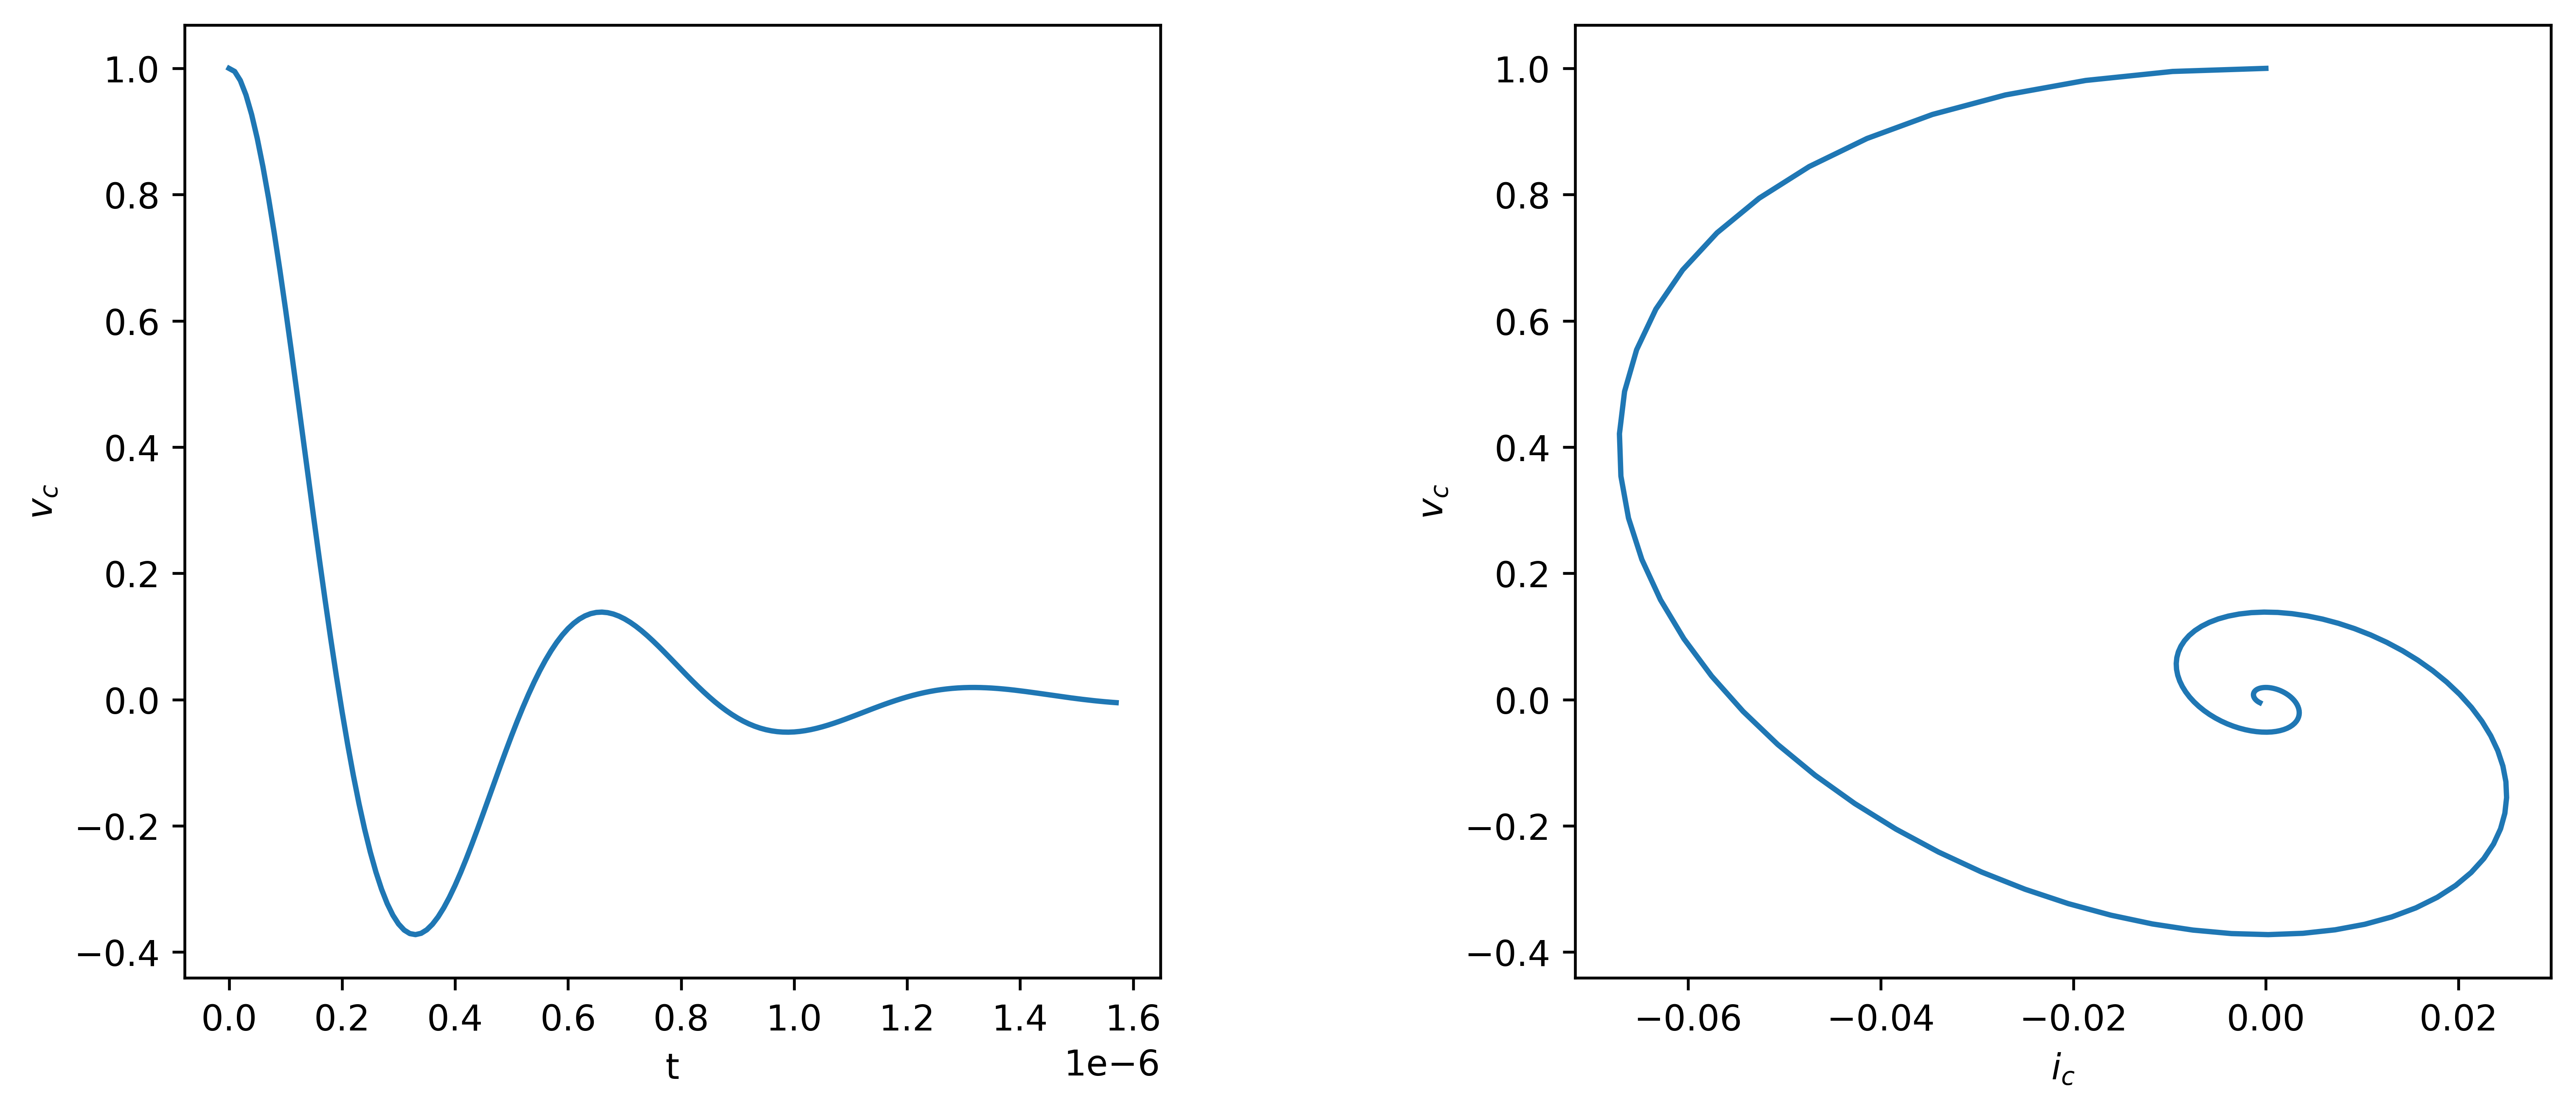

In [45]:
fig = plt.figure(figsize=(10,4.25), layout='constrained', dpi=600)
fig.get_layout_engine().set(wspace=0.2)
axL = fig.add_subplot(1,2,1, xlabel='t', ylabel='$v_c$')
axR = fig.add_subplot(1,2,2, xlabel='$i_c$', ylabel='$v_c$')
#axR.set_xticks([-0.1, -0.05, 0, 0.05, 0.1], minor=False)


axL.plot(t,x2)
axR.plot(x1,x2)

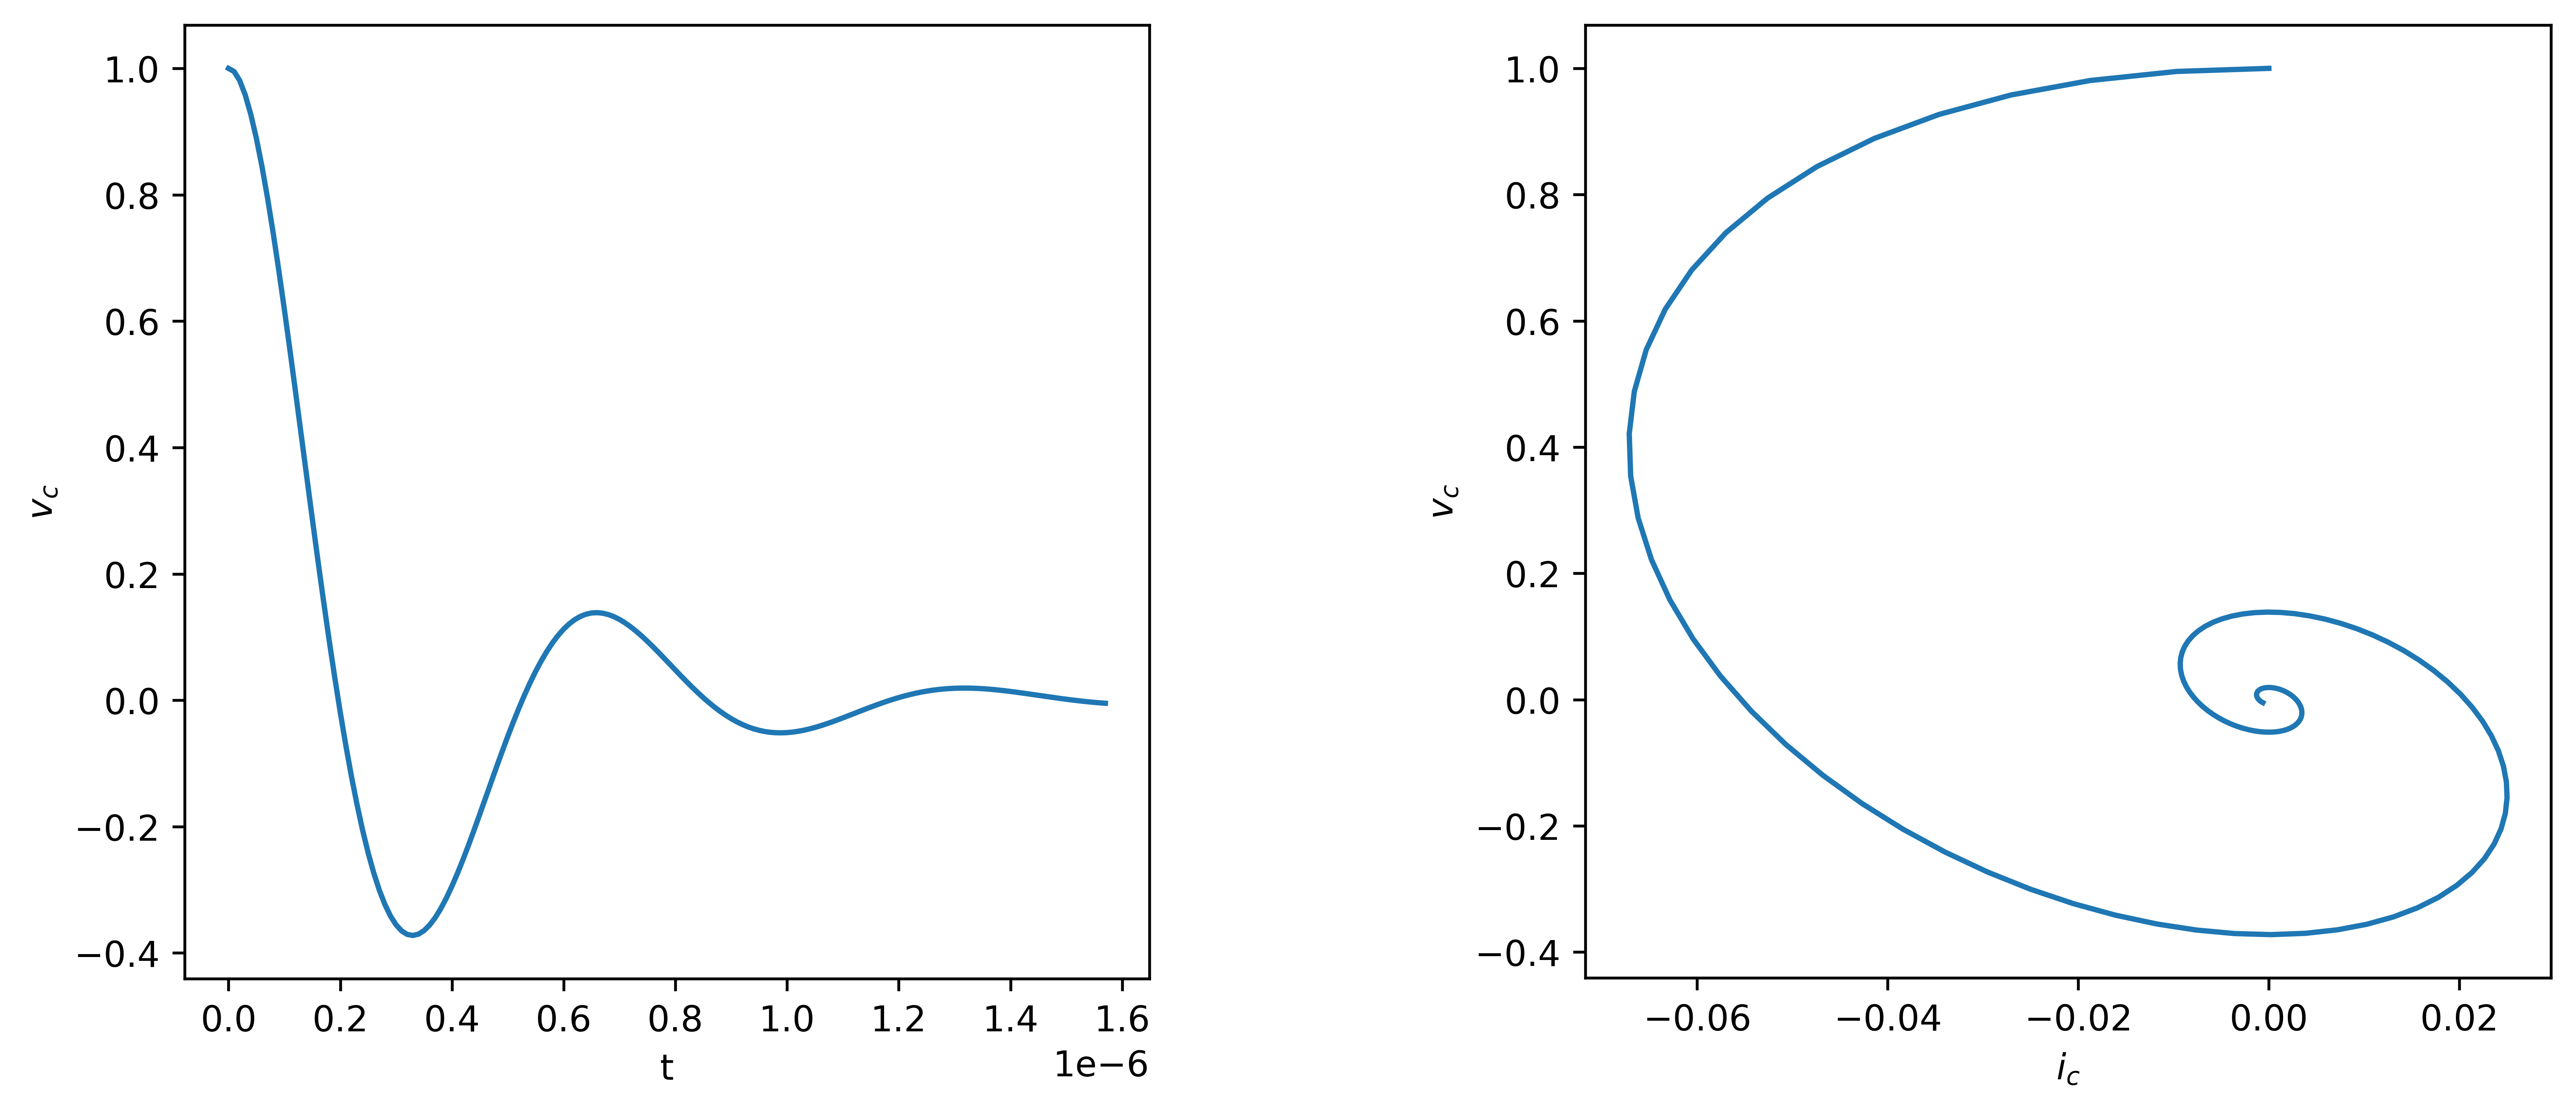

In [46]:
fig = plt.figure(figsize=(10,4.25), layout='constrained', dpi=600)
fig.get_layout_engine().set(wspace=0.2)
sfigs = fig.subfigures(1, 2)
axsL = sfigs[0].add_subplot(xlabel='t', ylabel='$v_c$')
axsR = sfigs[1].add_subplot(xlabel='$i_c$', ylabel='$v_c$')

axsL.plot(t,x2)
axsR.plot(x1,x2)

# Split Capacitor

In [47]:
R, L, C1, C2 = symbols('R, L, C1, C2')
A = Matrix([[-R/L,1/L,-1/L],
           [-1/C,0,0],
           [1/C,0,0]])
A

Matrix([
[-R/L, 1/L, -1/L],
[-1/C,   0,    0],
[ 1/C,   0,    0]])

In [48]:
a = A.eigenvects()

In [49]:
a

[(0,
  1,
  [Matrix([
   [0],
   [1],
   [1]])]),
 (-R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L),
  1,
  [Matrix([
   [C*(-R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L))],
   [                                           -1],
   [                                            1]])]),
 (-R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L),
  1,
  [Matrix([
   [C*(-R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L))],
   [                                           -1],
   [                                            1]])])]

In [50]:
a[0][0]
a[0][2][0]
a[1][0]
a[1][2][0]
print(a[2][0])
a[2][2][0]

0

Matrix([
[0],
[1],
[1]])

-R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L)

Matrix([
[C*(-R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L))],
[                                           -1],
[                                            1]])

-R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L)


Matrix([
[C*(-R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L))],
[                                           -1],
[                                            1]])

In [51]:
P = a[0][2][0]
P = P.col_insert(1, a[2][2][0])
P = P.col_insert(2, a[1][2][0])
P = P/C
P
from sympy.abc import t
D = diag(E**(t*a[0][0]), E**(t*a[2][0]), E**(t*a[1][0]))
D
P**-1

Matrix([
[  0, -R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L), -R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L)],
[1/C,                                      -1/C,                                      -1/C],
[1/C,                                       1/C,                                       1/C]])

Matrix([
[1,                                                  0,                                                  0],
[0, exp(t*(-R/(2*L) + sqrt(C*(C*R**2 - 8*L))/(2*C*L))),                                                  0],
[0,                                                  0, exp(t*(-R/(2*L) - sqrt(C*(C*R**2 - 8*L))/(2*C*L)))]])

Matrix([
[                                                                              0,                                                              C/2,                                                               C/2],
[(-C*L*R + L*sqrt(C**2*R**2 - 8*C*L))/(C*R**2 - 8*L - R*sqrt(C**2*R**2 - 8*C*L)),                 2*C*L/(C*R**2 - 8*L - R*sqrt(C**2*R**2 - 8*C*L)),                 -2*C*L/(C*R**2 - 8*L - R*sqrt(C**2*R**2 - 8*C*L))],
[                                                   -C*L/sqrt(C**2*R**2 - 8*C*L), (C**2*R - C*sqrt(C**2*R**2 - 8*C*L))/(4*sqrt(C**2*R**2 - 8*C*L)), (-C**2*R + C*sqrt(C**2*R**2 - 8*C*L))/(4*sqrt(C**2*R**2 - 8*C*L))]])

In [52]:
Adiag = P*D*P**-1

In [53]:
Adiag = simplify(Adiag)

In [54]:
Adiag

Matrix([
[(C*(C*R + sqrt(C*(C*R**2 - 8*L)))*(-C*R**2 + 8*L + R*sqrt(C*(C*R**2 - 8*L)))*exp(t*(C*R - sqrt(C*(C*R**2 - 8*L)))/(2*C*L)) - sqrt(C*(C*R**2 - 8*L))*(C*R - sqrt(C*(C*R**2 - 8*L)))**2*exp(t*(C*R + sqrt(C*(C*R**2 - 8*L)))/(2*C*L)))*exp(-R*t/L)/(2*C*sqrt(C*(C*R**2 - 8*L))*(-C*R**2 + 8*L + R*sqrt(C*(C*R**2 - 8*L)))),                                                  (C*R - sqrt(C*(C*R**2 - 8*L)))*(8*L*sqrt(C*(C*R**2 - 8*L))*exp(t*(C*R + sqrt(C*(C*R**2 - 8*L)))/(2*C*L)) - (C*R + sqrt(C*(C*R**2 - 8*L)))*(-C*R**2 + 8*L + R*sqrt(C*(C*R**2 - 8*L)))*exp(t*(C*R - sqrt(C*(C*R**2 - 8*L)))/(2*C*L)))*exp(-R*t/L)/(8*L*sqrt(C*(C*R**2 - 8*L))*(-C*R**2 + 8*L + R*sqrt(C*(C*R**2 - 8*L)))),                    (L*sqrt(C*(C*R**2 - 8*L))*(-C*R + sqrt(C*(C*R**2 - 8*L)))*exp(t*(C*R + sqrt(C*(C*R**2 - 8*L)))/(2*C*L)) + (C*R - sqrt(C*(C*R**2 - 8*L)))*(C*R + sqrt(C*(C*R**2 - 8*L)))*(-C*R**2 + 8*L + R*sqrt(C*(C*R**2 - 8*L)))*exp(t*(C*R - sqrt(C*(C*R**2 - 8*L)))/(2*C*L))/8)*exp(-R*t/L)/(L*sqrt(C*(C*R**2 - 8*L

Rediculous. Let's redefine the matrices in terms of $\omega$.\
$$
      \vec{\omega} =
      \begin{bmatrix} 
          0 \\
          - \frac{R}{2 L} + \frac{\sqrt{C \left(C R^{2} - 8 L\right)}}{2 C L} \\
          - \frac{R}{2 L} - \frac{\sqrt{C \left(C R^{2} - 8 L\right)}}{2 C L}
       \end{bmatrix}
$$

In [55]:
w0, w1, w2 = symbols('w0, w1, w2')
P[0,1] = w1
P[0,2] = w2
P
D = diag(E**(t*w0), E**(t*w1), E**(t*w2))
D
simplify(P**-1)

Matrix([
[  0,   w1,   w2],
[1/C, -1/C, -1/C],
[1/C,  1/C,  1/C]])

Matrix([
[exp(t*w0),         0,         0],
[        0, exp(t*w1),         0],
[        0,         0, exp(t*w2)]])

Matrix([
[           0,                 C/2,                 C/2],
[ 1/(w1 - w2),  C*w2/(2*(w1 - w2)), -C*w2/(2*w1 - 2*w2)],
[-1/(w1 - w2), -C*w1/(2*w1 - 2*w2),  C*w1/(2*(w1 - w2))]])

In [56]:
P*D


Matrix([
[          0, w1*exp(t*w1), w2*exp(t*w2)],
[exp(t*w0)/C, -exp(t*w1)/C, -exp(t*w2)/C],
[exp(t*w0)/C,  exp(t*w1)/C,  exp(t*w2)/C]])

In [57]:
Adiag = simplify(P*D*P**-1)
Adiag

Matrix([
[(w1*exp(t*w1) - w2*exp(t*w2))/(w1 - w2),                      C*w1*w2*(exp(t*w1) - exp(t*w2))/(2*(w1 - w2)),                     C*w1*w2*(-exp(t*w1) + exp(t*w2))/(2*(w1 - w2))],
[ (-exp(t*w1) + exp(t*w2))/(C*(w1 - w2)),  (w1*exp(t*w2) - w2*exp(t*w1) + (w1 - w2)*exp(t*w0))/(2*(w1 - w2)), (-w1*exp(t*w2) + w2*exp(t*w1) + (w1 - w2)*exp(t*w0))/(2*(w1 - w2))],
[  (exp(t*w1) - exp(t*w2))/(C*(w1 - w2)), (-w1*exp(t*w2) + w2*exp(t*w1) + (w1 - w2)*exp(t*w0))/(2*(w1 - w2)),  (w1*exp(t*w2) - w2*exp(t*w1) + (w1 - w2)*exp(t*w0))/(2*(w1 - w2))]])

This would be great if $\omega_{1,2}$ were separable into real and imaginary parts, and they are. woot!

In [143]:
a, b, t = symbols('a, b, t')
A = Matrix([[E**(t*a)*((a/b)*sin(b*t)+cos(b*t)), C*(a**2+b**2)/(2*b)*(E**(t*a)*sin(b*t)), -C*(a**2+b**2)/(2*b)*(E**(t*a)*sin(b*t))],
           [-(E**(t*a)*sin(b*t))/(C*b),(E**(t*a)/2)*((-a/b)*sin(b*t)+cos(b*t))+1/2,(E**(t*a)/2)*((a/b)*sin(b*t)-cos(b*t))+1/2],
           [(E**(t*a)*sin(b*t))/(C*b),(E**(t*a)/2)*((a/b)*sin(b*t)-cos(b*t))+1/2,(E**(t*a)/2)*((-a/b)*sin(b*t)+cos(b*t))+1/2]])
A

Matrix([
[(a*sin(b*t)/b + cos(b*t))*exp(a*t),     C*(a**2 + b**2)*exp(a*t)*sin(b*t)/(2*b),    -C*(a**2 + b**2)*exp(a*t)*sin(b*t)/(2*b)],
[          -exp(a*t)*sin(b*t)/(C*b), (-a*sin(b*t)/b + cos(b*t))*exp(a*t)/2 + 0.5,  (a*sin(b*t)/b - cos(b*t))*exp(a*t)/2 + 0.5],
[           exp(a*t)*sin(b*t)/(C*b),  (a*sin(b*t)/b - cos(b*t))*exp(a*t)/2 + 0.5, (-a*sin(b*t)/b + cos(b*t))*exp(a*t)/2 + 0.5]])

In [144]:
def scvar (x):
    x = x.replace(a, (-R/(2*L)))
    x = x.replace(b, (sqrt(C*(-C*R**2 + 8*L))/(2*C*L)))
    x = x.replace(R, 2.5)
    x = x.replace(C, 10E-9)
    #x = x.replace(C2, 10E-9)
    x = x.replace(L, 1E-6)
    return x

In [145]:
def re(x):
    x = float(x.replace(I, 0))
    return x
def im(x):
    x = x*(-I)
    x = simplify(x)
    x = float(x.replace(I,0))
    return x

In [172]:
s = np.arange(0, .000005, .000000001)
initcons = Matrix([0,8,0]) #INITAL CONDITIONS (iL_0, vC1_0, vC2_0)
A0 = A*initcons
iL = A0[0]
vC1 = A0[1]
vC2 = A0[2]
vL = L*diff(iL, t)
vL
vC1
vC2
iL = scvar(iL)
vL = scvar(vL)
vC1 = scvar(vC1)
vC2 = scvar(vC2)

L*(4*C*a*(a**2 + b**2)*exp(a*t)*sin(b*t)/b + 4*C*(a**2 + b**2)*exp(a*t)*cos(b*t))

4*(-a*sin(b*t)/b + cos(b*t))*exp(a*t) + 4.0

4*(a*sin(b*t)/b - cos(b*t))*exp(a*t) + 4.0

In [156]:
lam_vL = lambdify(t, vL, 'numpy' )
vLt = lam_vL(s)
lam_vC1 = lambdify(t, vC1, 'numpy' )
vC1t = lam_vC1(s)
lam_vC2 = lambdify(t, vC2, 'numpy' )
vC2t = lam_vC2(s)

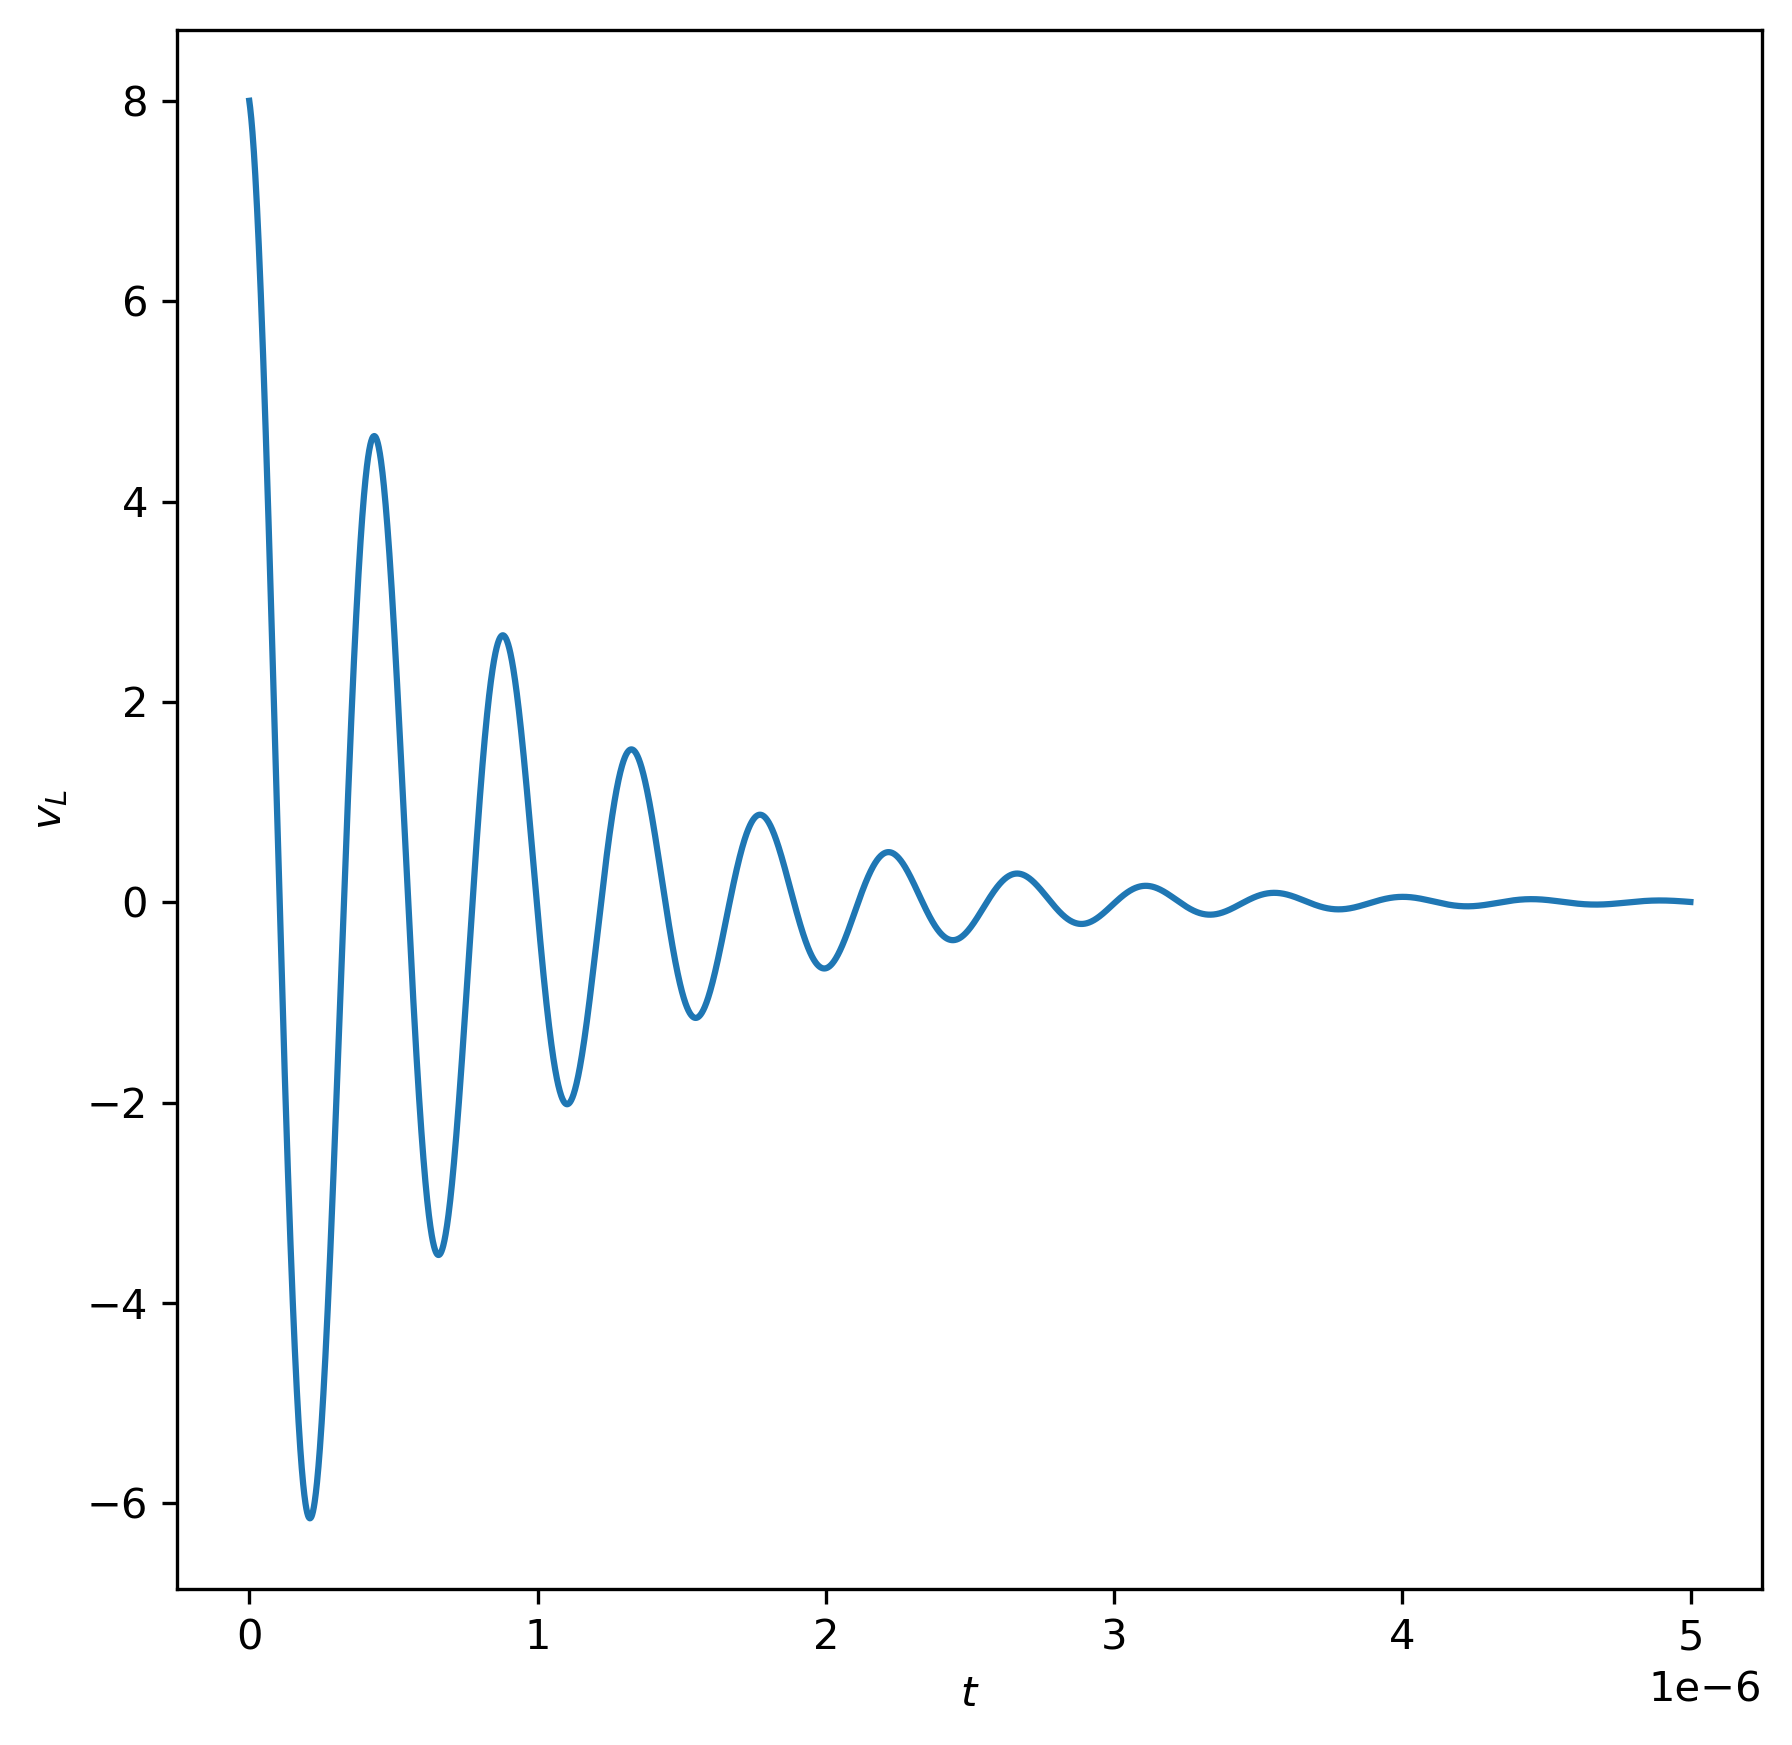

In [157]:
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 2, 1, xlabel='$t$', ylabel='$v_L$')
ax0.plot(s, vLt)

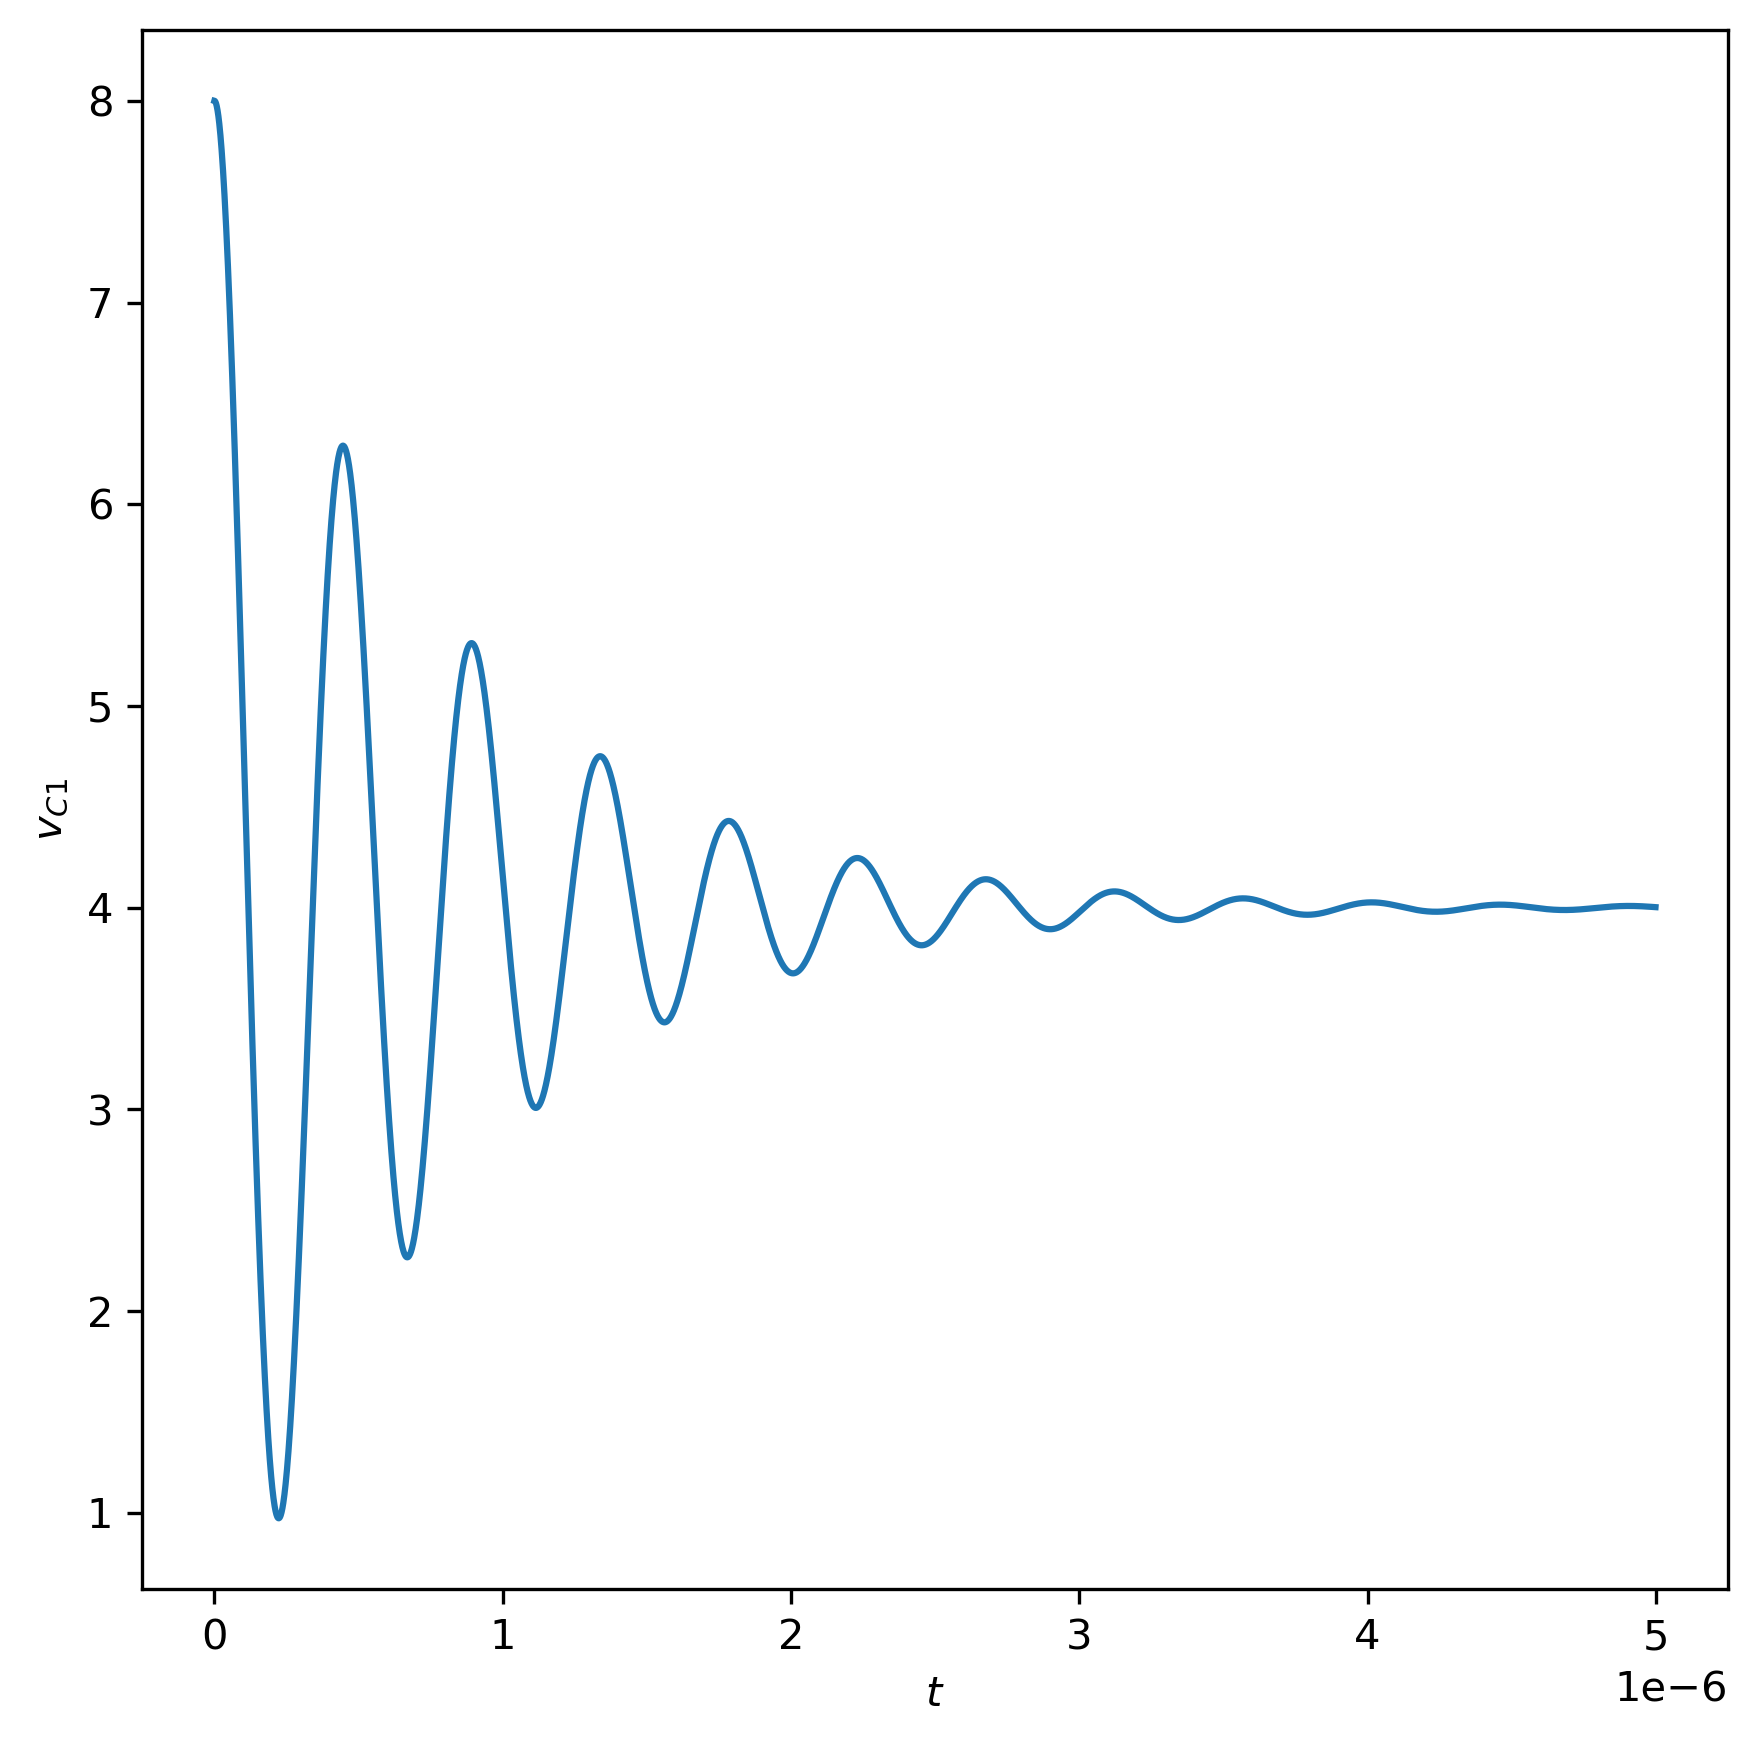

In [166]:
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 2, 1, xlabel='$t$', ylabel='$v_{C1}$')
ax0.plot(s, vC1t)

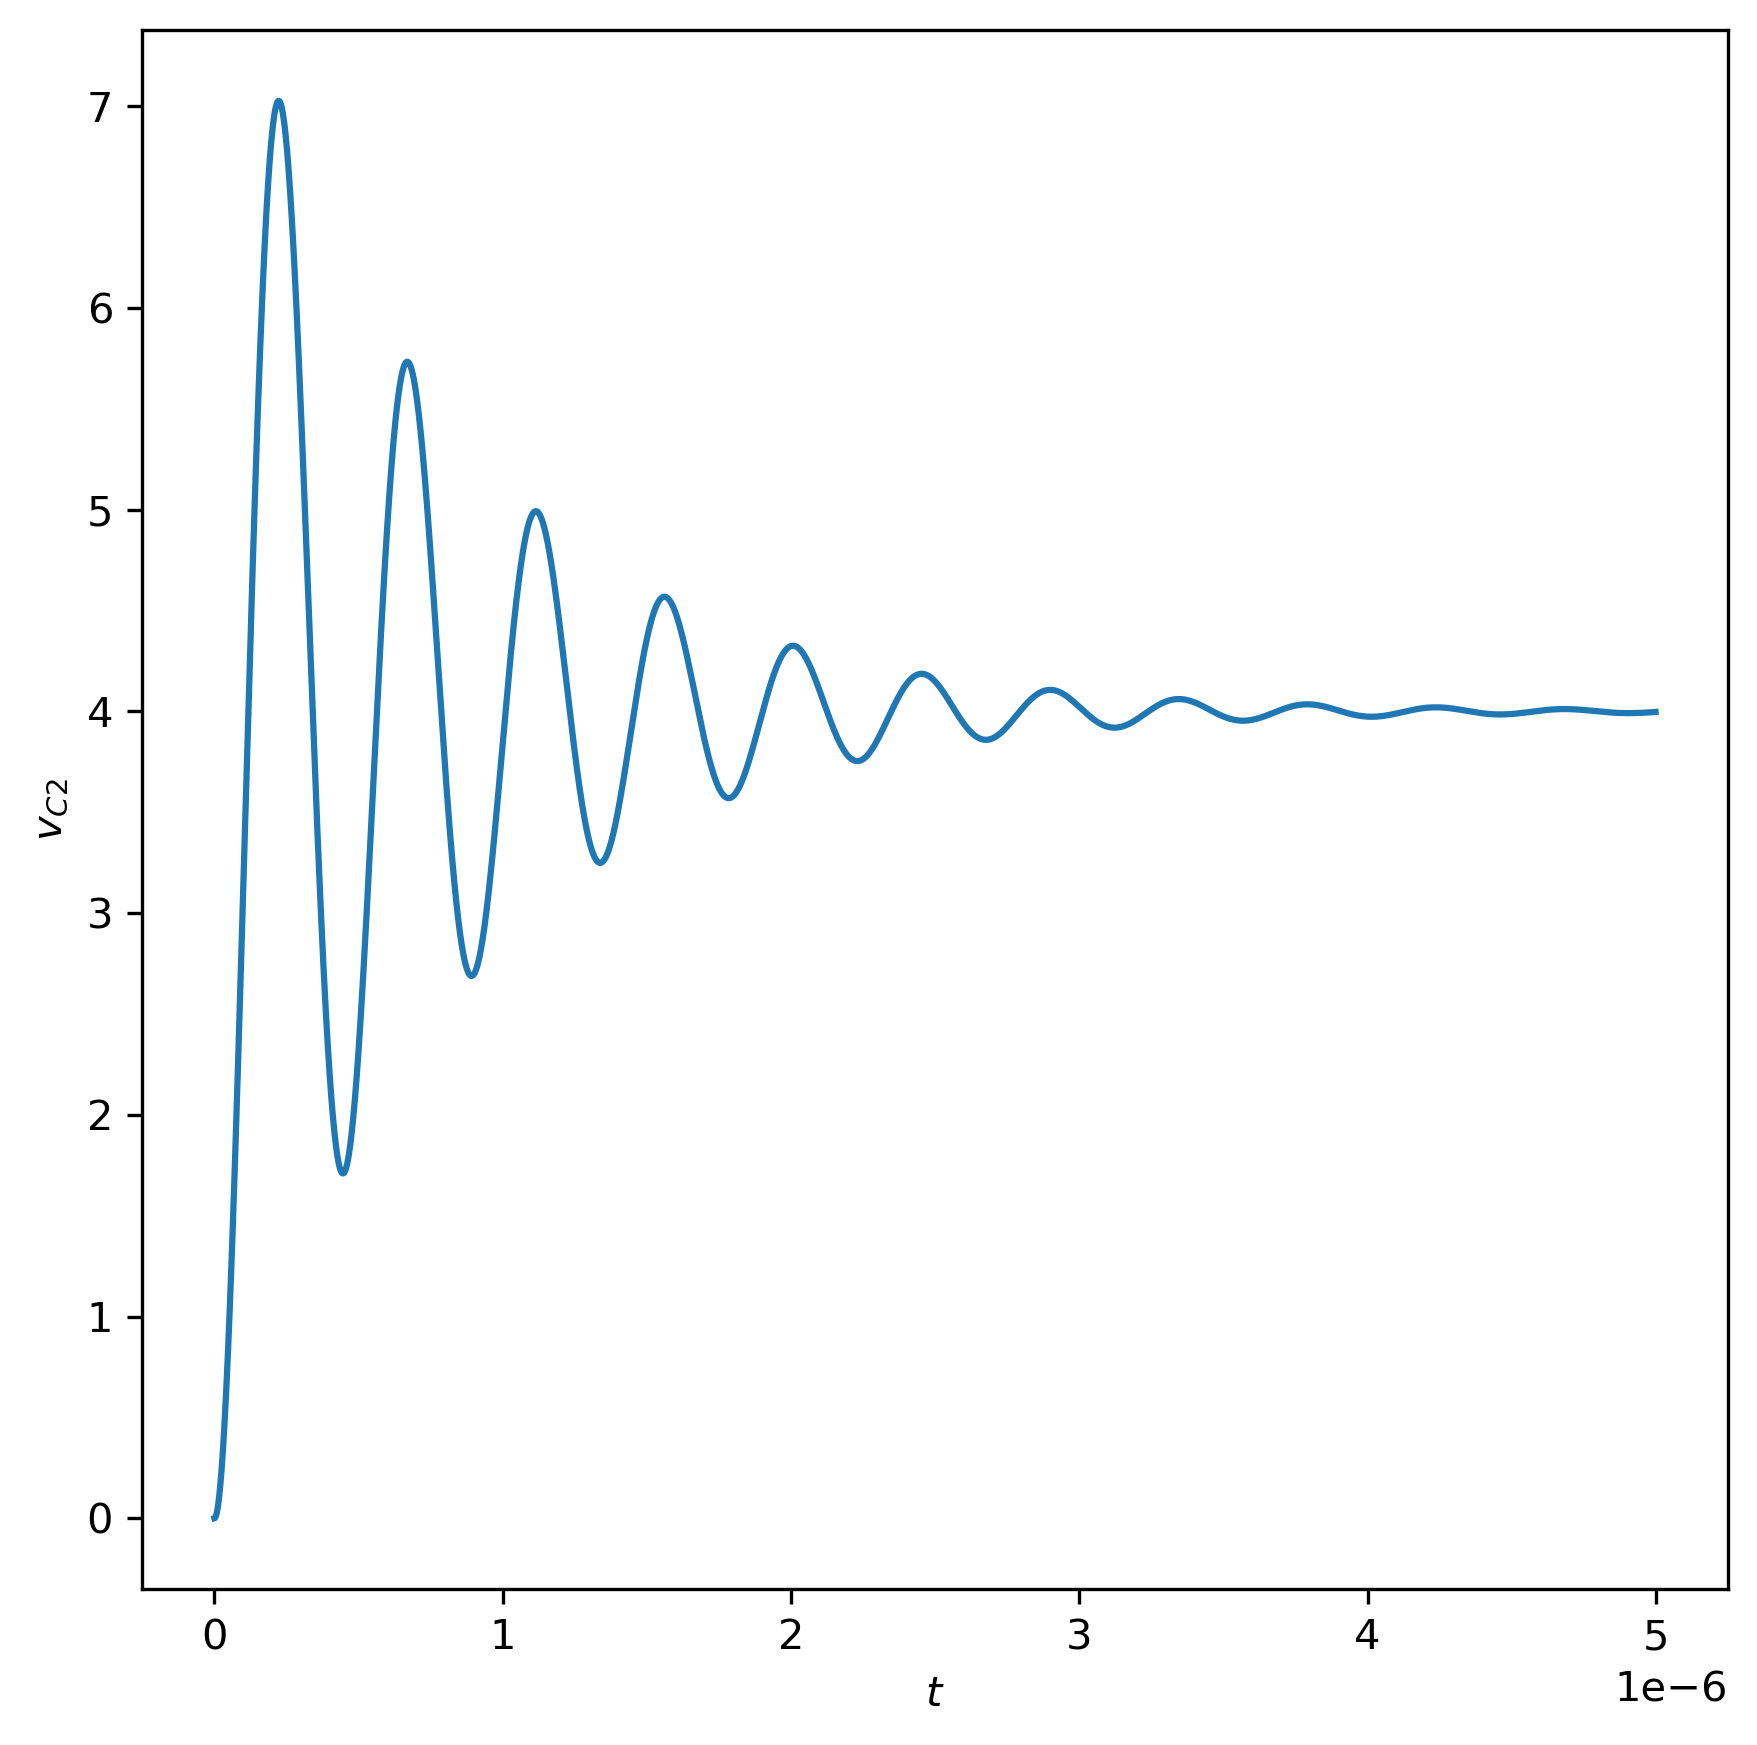

In [164]:
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(1, 2, 1, xlabel='$t$', ylabel='$v_{C2}$')
ax0.plot(s, vC2t)

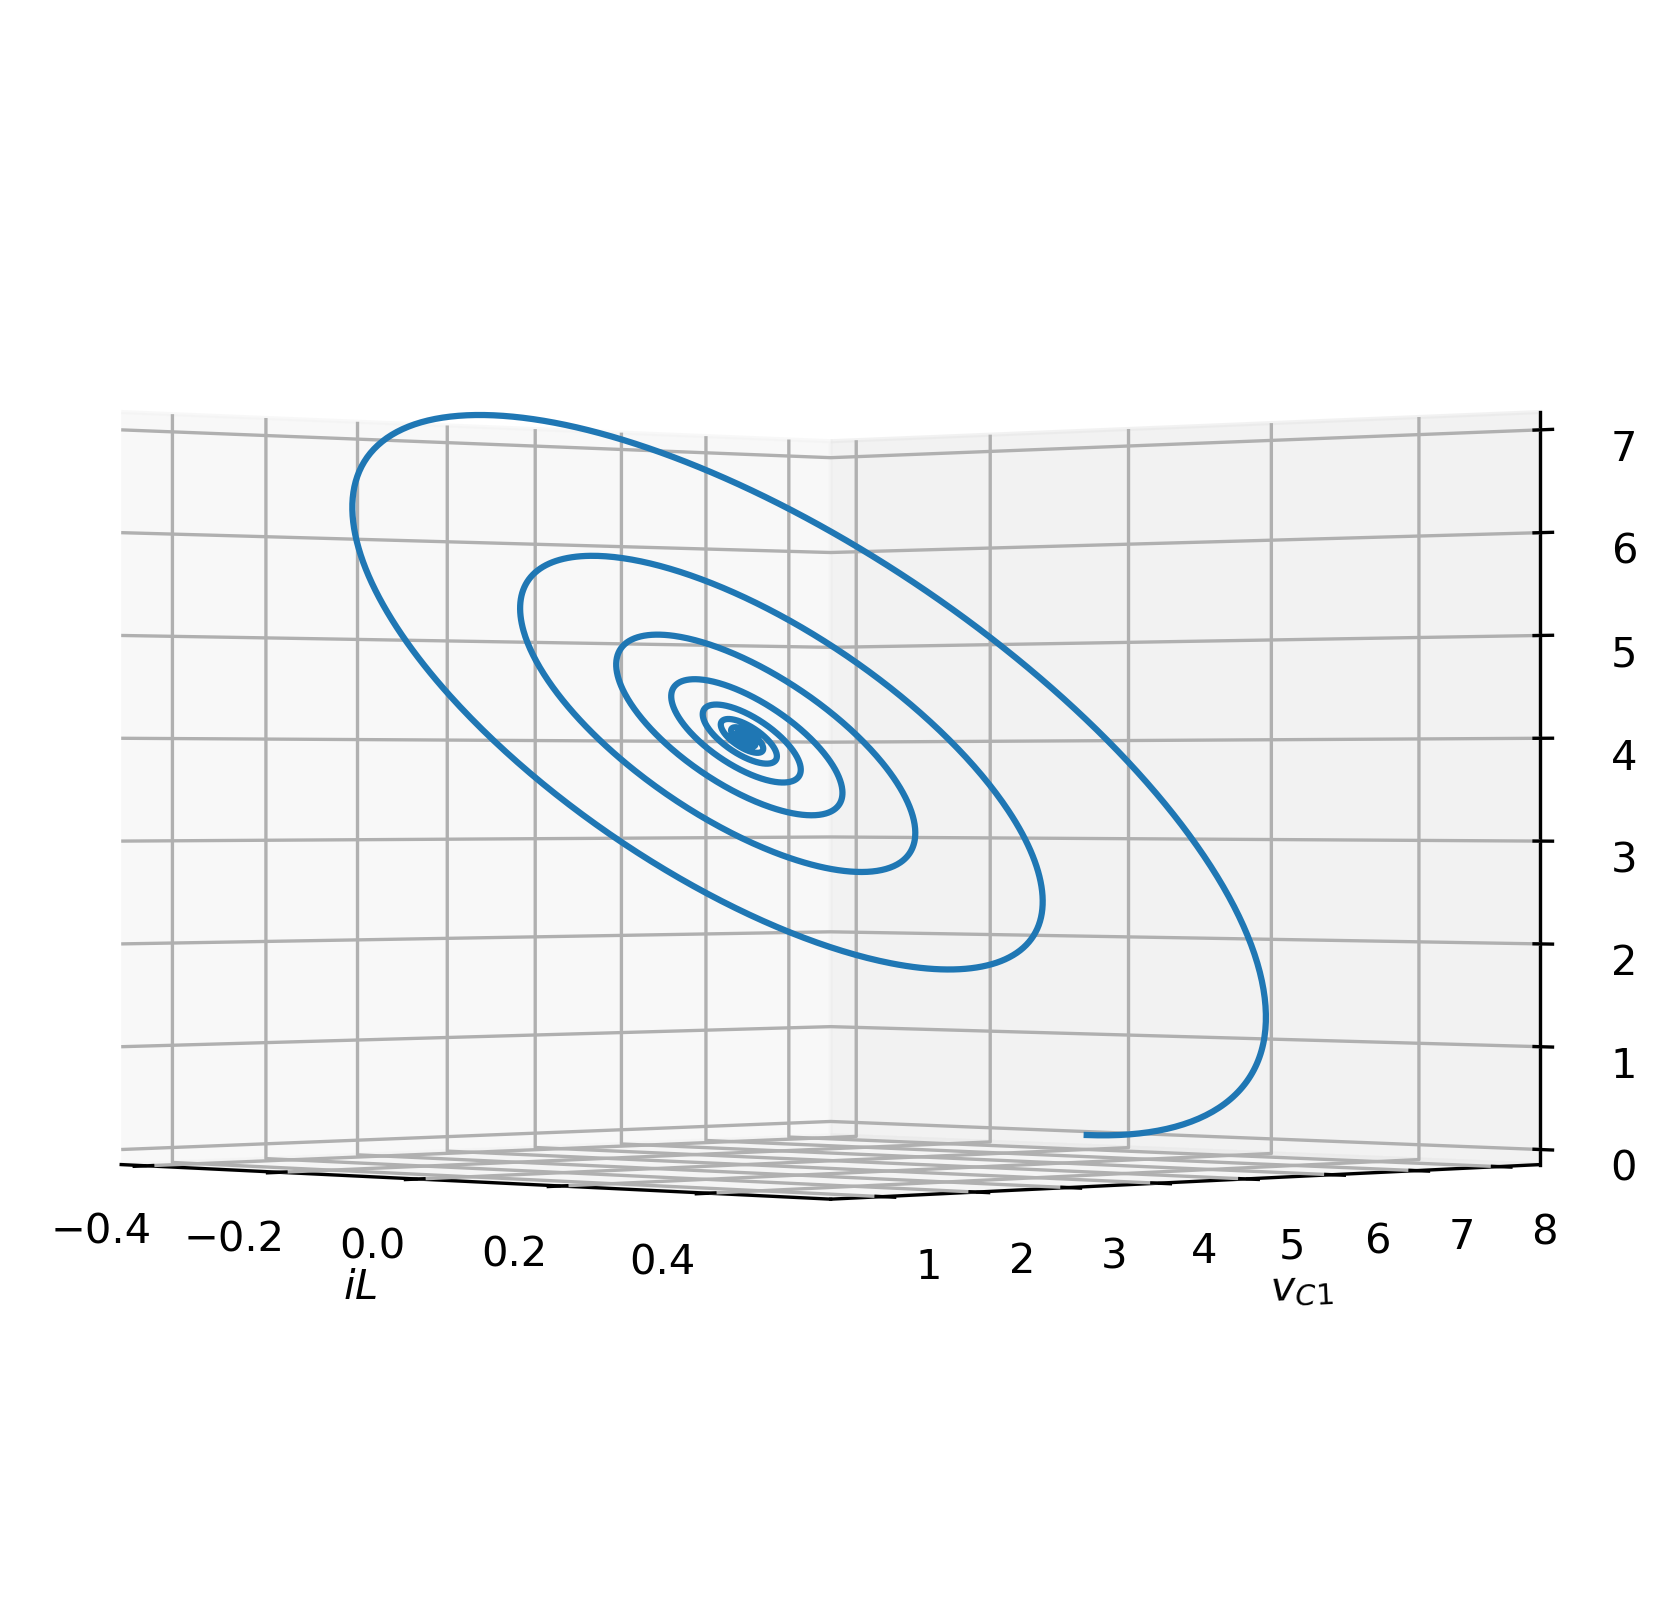

In [188]:
lam_iL = lambdify(t, iL, 'numpy' )
iLt = lam_iL(s)
fig = plt.figure(figsize=(15,6.75), dpi=300)
ax0 = fig.add_subplot(xlabel='$iL$', ylabel='$v_{C1}$', zlabel='$v_{C2}$', projection='3d')
view_1 = (25, -135)
view_2 = (0, -45)
init_view = view_2
ax0.view_init(*init_view)
ax0.plot3D(iLt, vC1t, vC2t)